In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

from scipy.interpolate import spline

import os
import ROOT
from ROOT import TFile, gROOT, gSystem, TGraphAsymmErrors
import rootnotes
import rootprint

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
%%rootprint
rootPath=os.path.expandvars("$VEGAS")
gSystem.Load("libTreePlayer.so");
gSystem.Load("libPhysics.so");
gSystem.Load(rootPath + "/common/lib/libSP24sharedLite.so");
gSystem.Load(rootPath + "/resultsExtractor/lib/libStage6shared.so");
gSystem.Load(rootPath + "/showerReconstruction2/lib/libStage4.so");
gSystem.AddIncludePath("-Wno-unused -Wno-shadow -Wno-unused-parameter");
gROOT.ProcessLine(".L " + rootPath + "/common/include/VACommon.h");
gROOT.ProcessLine(".include " + rootPath + "/common/include/");
gROOT.ProcessLine(".include " + rootPath + "/resultsExtractor/include/");

reloading /Users/ralph/Software/VEGAS-RalphEdits/common/include/VACommon.h  0
reloading VAUsefulConversions.h  0
reloading cfloat  0
reloading float.h  0
reloading /Users/ralph/Software/root-v5.34.34/etc/plugins/TArchiveFile/P010_TZIPFile.C  0
reloading /Users/ralph/Software/root-v5.34.34/etc/plugins/TVirtualStreamerInfo/P010_TStreamerInfo.C  0



In [27]:
eaF = TFile("EA_oa21stan_soft_ED_GRISU.root", "read")
ea = eaF.Get("effective_areas/EffectiveArea_Azimuth_0_Zenith_0_Noise_3.62_AbsoluteOffset_0")
h = ea.pfEffArea_MC
npoints     = h.GetN()

x1, y1 = [], []
for i in range(npoints):
    tmpX, tmpY = ROOT.Double(0), ROOT.Double(0)
    h.GetPoint(i, tmpX, tmpY)
    x1.append(tmpX)
    y1.append(tmpY)
        
x1 = np.array(x1)
y1 = np.array(y1)

In [16]:
eaF = TFile("EA_na21stan_soft_All_ED_GRISU.root", "read")
ea = eaF.Get("effective_areas/EffectiveArea_Azimuth_0_Zenith_0_Noise_4.3_AbsoluteOffset_0")

h = ea.pfEffArea_MC
npoints     = h.GetN()

x2, y2 = [], []
for i in range(npoints):
    tmpX, tmpY = ROOT.Double(0), ROOT.Double(0)
    h.GetPoint(i, tmpX, tmpY)
    x2.append(tmpX)
    y2.append(tmpY)
        
x2 = np.array(x2)
y2 = np.array(y2)

In [17]:
eaF = TFile("EA_ua21stan_soft_All_ED_GRISU.root", "read")
ea = eaF.Get("effective_areas/EffectiveArea_Azimuth_0_Zenith_0_Noise_4.24_AbsoluteOffset_0")

h = ea.pfEffArea_MC
npoints     = h.GetN()

x3, y3 = [], []
for i in range(npoints):
    tmpX, tmpY = ROOT.Double(0), ROOT.Double(0)
    h.GetPoint(i, tmpX, tmpY)
    x3.append(tmpX)
    y3.append(tmpY)
    
x3 = np.array(x3)
y3 = np.array(y3)

In [18]:
x1_smooth = np.linspace(x1.min(), x1.max(), 200)
order = 3
y1_smooth = spline(x1, y1, x1_smooth, order=order)
y2_smooth = spline(x2, y2, x1_smooth, order=order)
y3_smooth = spline(x3, y3, x1_smooth, order=order)

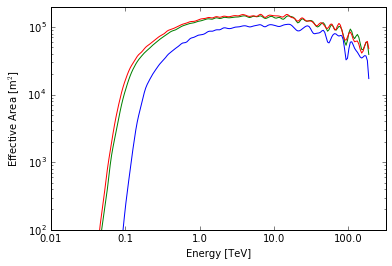

In [26]:
plt.plot(x1_smooth, y1_smooth, ls = "-", marker = "", color = "blue")
plt.plot(x1_smooth, y2_smooth, ls = "-", marker = "", color = "green")
plt.plot(x1_smooth, y3_smooth, ls = "-", marker = "", color = "red")
plt.semilogy(nonposy="clip")
plt.ylim(ymin=100, ymax = 2e5)
plt.ylabel(r"Effective Area [m$^2$]")
plt.xlabel("Energy [TeV]")

x = np.linspace(-2, 2, 5)
labels = pow(10, x)
t = plt.xticks(x, labels)



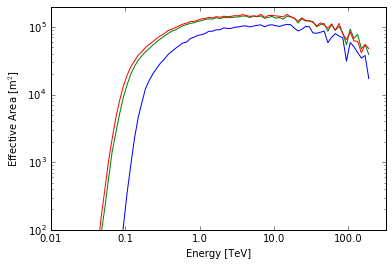

In [25]:
plt.plot(x1, y1, ls = "-", marker = "", color = "blue")
plt.plot(x2, y2, ls = "-", marker = "", color = "green")
plt.plot(x3, y3, ls = "-", marker = "", color = "red")
plt.semilogy(nonposy="clip")
plt.ylim(ymin=100, ymax = 2e5)
plt.ylabel(r"Effective Area [m$^2$]")
plt.xlabel("Energy [TeV]")

x = np.linspace(-2, 2, 5)
labels = pow(10, x)
t = plt.xticks(x, labels)